<a href="https://colab.research.google.com/github/Knxd3/CE888/blob/main/Lab3/Bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score as f1
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder


In [12]:
bank0 = pd.read_csv('bank-additional-full.csv', delimiter = ';')
bank1 = bank0.copy()
bank1.dropna()

del bank1['duration']
features = bank1.columns[0:len(bank1.columns)-1]
bank1.dropna()
outcome = bank1.columns[len(bank1.columns)-1]
bank1 = bank1.apply(LabelEncoder().fit_transform)

bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0


ratio yes to no:  11.27


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


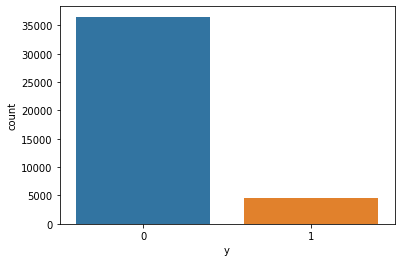

In [13]:
#imbalance
sns.countplot(bank1['y'])

imb = bank1['y'].value_counts()
print ('ratio yes to no: ', round(imb[1]/(imb[0]+imb[1])*100,2))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(bank1[features], bank1[outcome], test_size = 0.2, random_state = 50, stratify = bank1[outcome])

strf = y_train.value_counts()
# stratification
print(strf[1]/(strf[0]+strf[1]))

0.11198786039453718


In [26]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

results = dummy.predict(X_test)

dummy_results = (acc(y_test, results))

dummy_results


0.7991017237193494

In [16]:
model = RandomForestClassifier(n_estimators= 100, max_depth = 3)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
scores = cross_val_score(model, X_train, y_train, cv = 10, scoring = make_scorer(acc))
score_avg = scores.mean()
print(score_avg, dummy_results)


0.9003641881638847 0.7991017237193494


In [59]:
from sklearn.model_selection import GridSearchCV

RF = RandomForestClassifier()
params = [{'n_estimators': [i for i in range(100,1000,100)], 
           'max_depth':[i for i in range(3,9)]}]

gr = GridSearchCV(RF,params, cv=10, n_jobs=1, verbose=0)

res = gr.fit(X_train, y_train)

#res.best_params_  {'max_depth': 8, 'n_estimators': 200} - takes very long to run

In [70]:
res.best_params_ 

model1 = RandomForestClassifier(n_estimators= 200, max_depth = 8)

model1.fit(X_train,y_train)

scores_opt = cross_val_score(model1, X_train, y_train, cv=10, scoring = make_scorer(acc))

score_optimised = scores_opt.mean()

score_optimised

0.9012746585735965

In [84]:
importances = model1.feature_importances_

indices = np.argsort(importances)[::-1]

top_feat = bank1.iloc[0:, indices[0:3]]

top_feat.head()

,nr.employed,euribor3m,pdays
0,8,287,26
1,8,287,26
2,8,287,26
3,8,287,26
4,8,287,26


Lab

In [90]:
m1 = RandomForestClassifier(n_estimators= 100, max_depth = 3)

m1.fit(X_train, y_train)

r1 = m1.predict(X_test)

perf = f1(y_test, r1)

print(f1(y_test,results), perf)

0.10877759827679052 0.27860696517412936


In [100]:
qX_train, qX_test, qy_train, qy_test = train_test_split(bank1[features], bank1[outcome], test_size = 0.2, random_state = 50, stratify = bank1[outcome])

m2 = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state= 60)

s1 = cross_val_score(m2, qX_train, qy_train, cv = 10, scoring = make_scorer(f1))

round(s1.mean(),2)

0.33

In [103]:
m3 = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state= 60)
m3.fit(qX_train, qy_train)

s2 = m3.predict(qX_test)

print(f1(qy_test,s2))

0.3542319749216301


In [109]:
m4 = RandomForestClassifier(n_estimators=750, max_depth = 6, random_state= 60)
m4.fit(qX_train, qy_train)

s3 = m4.predict(qX_test)

i = np.argsort(m4.feature_importances_)[::-1]

bank1.columns[i[0:3]]

Index(['nr.employed', 'euribor3m', 'pdays'], dtype='object')